# 7 Limit Cycles
---

*Overview*

- [7.0 Introduction](#7.0-Introduction)

---

In [1]:
# import
import numpy as np
import scipy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython

import datetime
dt = datetime.datetime.now()

print('%s-%s-%s %s:%s:%s\n----------------------\n' 'numpy\t\t%s\n' 'scipy\t\t%s\n' 'pandas\t\t%s\n' 'matplotlib\t%s\n' '----------------------\n' 'ipython\t\t%s' % 
      (dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, np.__version__, scipy.__version__, pd.__version__, mpl.__version__, IPython.__version__))

2018-7-8 21:41:29
----------------------
numpy		1.13.3
scipy		0.19.1
pandas		0.22.0
matplotlib	2.1.1
----------------------
ipython		6.1.0


In [2]:
c = ['#1f77b4', 
     '#ff7f0e', 
     '#2ca02c', 
     '#d62728', 
     '#9467bd', 
     '#8c564b', 
     '#e377c2', 
     '#7f7f7f', 
     '#bcbd22', 
     '#17becf']

l = ['-', '--', '-.', ':']
m = ['o', 'x', 's']

In [ ]:
xmin, xmax, ymin, ymax = -1, 1, -1, 1

x, y = np.linspace(xmin, xmax), np.linspace(ymin, ymax)

xlim(xmin, xmax)
ylim(ymin, ymax)

plt.text(, , r'$$', 
         ha='center', va='center', 
         bbox=dict(fc=(1, 1, 1, .7), ec='none'))

figname = ''
plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

$$\begin{align*}
& \quad\quad (7..)
\end{align*}$$

---

## 7.0 Introduction
---

**limit cycle**
- isolated closed trajectory


- stable / attracting:
    - all neiboring trajectories approach the limit cycle
- unstable
- half-stable





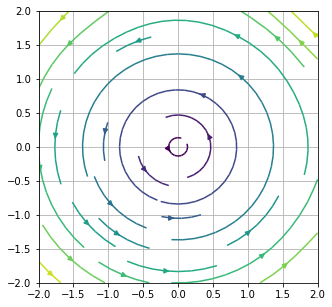

In [10]:
A = np.array([[0, -1], [1,0]])

def x_dot(x, y, A):
    x_ = A[0,0]*x + A[0,1]*y
    return x_

def y_dot(x, y, A):
    y_ = A[1,0]*x + A[1,1]*y
    return y_

def speed(x, y, A):
    s = x_dot(x, y, A)**2 + y_dot(x, y, A)**2
    s = np.sqrt(s)
    return s

def X_dot(X, A):
    X_ = np.dot(A, X)
    return X_

x, y = np.linspace(-2, 2, 10), np.linspace(-2, 2, 10)
x, y = np.meshgrid(x, y)

plt.figure(figsize=(5, 5))
figname='7_0_2'

plt.streamplot(x, y, x_dot(x, y, A), y_dot(x, y, A), 
               density=.5,
               color=speed(x, y, A), cmap='viridis')


plt.grid(True)
# plt.tight_layout()

plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)
plt.show()

## 7.1 Examples
---

### Example 7.1.1: A Simple Limit Cycle

consider

$$\begin{align*}
\dot{r} &= r(1 - r^2) \\
\dot{\theta} &= 1
& \quad\quad (7.1.1)
\end{align*}$$

where $r ≥ 0$

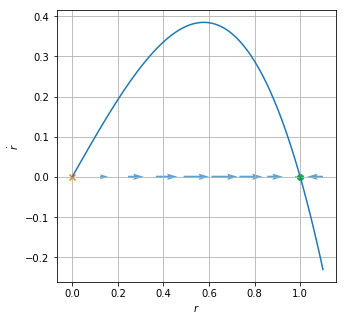

In [6]:
def r_dot(r):
    return r * (1 - r**2)
    
r = np.linspace(0, 1.1, 100)
r_vec = np.linspace(0, 1.1, 10)

fig, ax = plt.subplots(figsize=(5, 5))


ax.plot(r, r_dot(r))
ax.quiver(r_vec, 0, r_dot(r_vec), 0, color=c[0], alpha=.7)
ax.scatter(0, 0, c=c[1], marker=m[1])
ax.scatter(1, 0, c=c[2], marker=m[0])

ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$\dot{r}$')
ax.grid(True)

figname = '7_1_1'
# ax.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
#            orientation='portrait', papertype=None, format='png',
#            transparent=False, bbox_inches=None, pad_inches=0.1,
#            frameon=None)

plt.show()

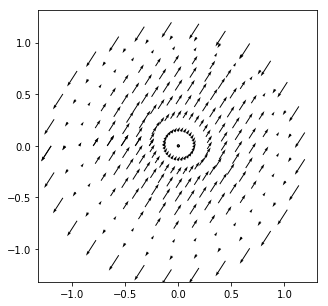

In [9]:
def cos(theta):
    return np.cos(theta)
def sin(theta):
    return np.sin(theta)

def r_dot(r, theta):
    return r * (1 - r**2)

def theta_dot(r, theta):
    return 1
    
def x_dot(r, theta):
    return cos(1) * r_dot(r, theta)
def y_dot(r, theta):
    return sin(1) * r_dot(r, theta)
    
r = np.linspace(0.01, 1.2, 10)
theta = np.linspace(-np.pi, np.pi, 30)
r, theta = np.meshgrid(r, theta)


x = cos(theta) * r
y = sin(theta) * r

# figname = '7_1_2'
fig, ax = plt.subplots(figsize=(5, 5))

ax.quiver(x, y, x_dot(r, theta), y_dot(r, theta))

# ax.xlabel(r'$x$')
# ax.ylabel(r'$y$')
# ax.grid(True)

# plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
#             orientation='portrait', papertype=None, format='png',
#             transparent=False, bbox_inches=None, pad_inches=0.1,
#             frameon=None)

plt.show()

# print(x)
# print(y)
# print(np.shape(x_dot(r, theta)))
# print(np.shape(y_dot(r, theta)))

### Example 7.1.2: Van Der Pol Oscillator

$$\begin{align*}
\ddot{x} + \mu(x^2 - 1) \dot{x} + x = 0
&\quad\quad (7.1.2)
\end{align*}$$

$$\begin{cases}
\dot{x} = y \\
\dot{y} =  -\mu(x^2-1)y - x
\end{cases}$$

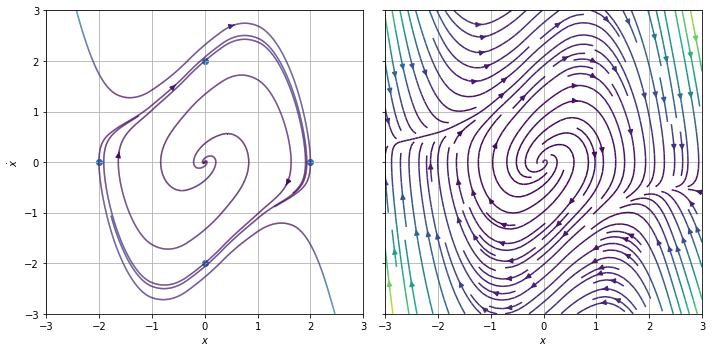

In [72]:
mu = 1

def x_dot(x, y):
    return y
def y_dot(x, y):
    return - mu * (x**2 - 1) *y -x
def speed(x, y):
    return np.sqrt(x_dot(x, y)**2 + y_dot(x, y)**2)

xmin, xmax, ymin, ymax = -3, 3, -3, 3
x, y = np.linspace(xmin, xmax, 10), np.linspace(ymin, ymax, 10)
x, y = np.meshgrid(x, y)

spt = np.array([[-2, 0], [2, 0], [0, -2], [0, 2]])
# spt = np.array([[1, 0], [2, 0]])

fig, (ax0, ax1) = plt.subplots(sharex=True, sharey=True, ncols=2, figsize=(10, 5))

ax0.streamplot(x, y, x_dot(x, y), y_dot(x, y), 
               color=speed(x, y), 
               start_points=spt, density=20)
spt = spt.T
ax0.scatter(spt[0], spt[1], c=c[0], marker=m[0])
ax0.grid(True)

ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymin, ymax)
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$\dot{x}$')

ax1.streamplot(x, y, x_dot(x, y), y_dot(x, y), 
               color=speed(x, y), 
               density=1.5)
ax1.grid(True)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax1.set_xlabel(r'$x$')
# ax1.set_ylabel(r'$\dot{x}$')

plt.tight_layout()
plt.show()

## 7.2 Ruling Out Closed Orbits
---

### Gradient Systems

**gradient system** w/ **potential fn**

$\dot{x} = -\nabla V$

*Theorem 7.2.1*
Closed orbits are impossible in gradient system

*Proof*

$$\begin{align*}
\Delta V &= \int_0^\infty\frac{dV}{dt} dt \\
&= \int_0^\infty (\nabla V \cdot \mathbf{\dot{x}}) dt \\
&= - \int_0^\infty || \mathbf{\dot{x}} ||^2 dt \\
&< 0
\end{align*}$$



---
*Overview*

- [7.0 Introduction](#7.0-Introduction)
- [7.1 Examples](#7.1-Examples)
    - [Example 7.1.1](#Example-7.1.1)
    - [Example 7.1.2](#Example-7.1.2)
- [7.2 Ruling Out Closed Orbits](#7.2-Ruling-Out-Closed-Orbits)
    - [Gradient Systems](#Gradient-Systems)